<a href="https://colab.research.google.com/github/Yosuf20/Cat-Dog-Classification-CNN/blob/main/Cat_V_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cat-and-dog' dataset.
Path to dataset files: /kaggle/input/cat-and-dog


In [ ]:
path_train = "/kaggle/input/cat-and-dog/training_set/training_set"
path_test = "/kaggle/input/cat-and-dog/test_set/test_set"

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    path_train,
    labels = "inferred",
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
  path_test,
  labels = "inferred",
  label_mode = 'int',
  batch_size = 32,
  image_size = (256, 256)

)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [ ]:
#from keras.src.layers.preprocessing.image_preprocessing.bounding_boxes import validation
#normalization

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
#Creating Convolution layers

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9976 - loss: 0.0080 - val_accuracy: 0.7182 - val_loss: 2.2193
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9969 - loss: 0.0087 - val_accuracy: 0.7014 - val_loss: 2.5436
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9935 - loss: 0.0252 - val_accuracy: 0.7336 - val_loss: 2.3257
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.9990 - loss: 0.0083 - val_accuracy: 0.7360 - val_loss: 2.4992
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9962 - loss: 0.0113 - val_accuracy: 0.7306 - val_loss: 2.4201
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.9991 - loss: 0.0048 - val_accuracy: 0.7365 - val_loss: 2.4454
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9968 - loss: 0.0071 - val_accuracy: 0.6777 - val_loss: 2.3695
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9856 - loss: 0.0477 - 

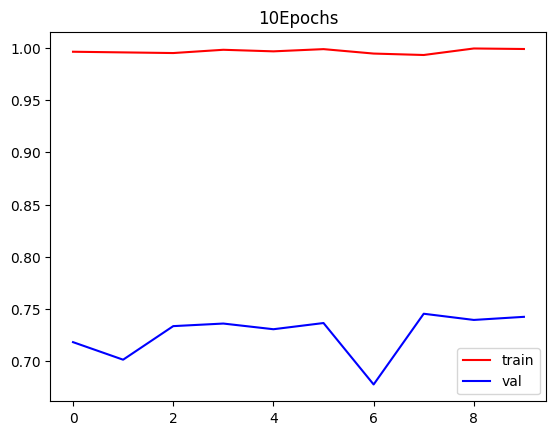

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='val')
plt.title('10Epochs')
plt.legend()
plt.show()

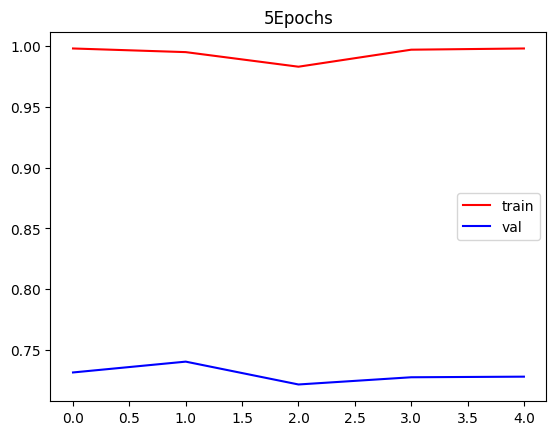

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='val')
plt.title('5Epochs')
plt.legend()
plt.show()

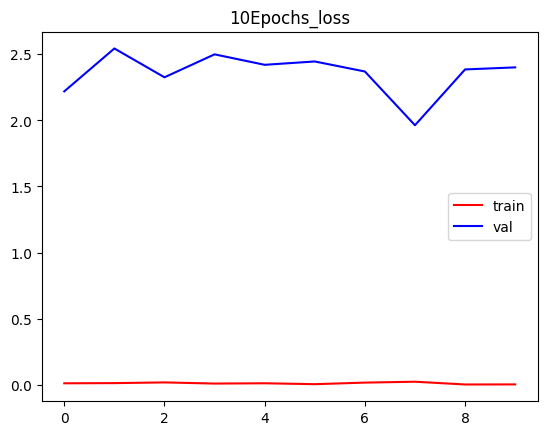

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='val')
plt.title('10Epochs_loss')
plt.legend()
plt.show()